In [3]:
# Step 1: Import necessary libraries
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Step 2: Load the .mat file
mat_file_path = "dataset/BRCA1View1000.mat"
mat_data = scipy.io.loadmat(mat_file_path)


In [5]:
# Step 3: Inspect the keys in the .mat file
print("Keys in the MAT file:", mat_data.keys())

Keys in the MAT file: dict_keys(['__header__', '__version__', '__globals__', 'data', 'targets'])


In [6]:
# Step 4: Extract the gene expression matrix and target labels
X = mat_data['data']          # shape: genes x samples
y = mat_data['targets'].flatten()  # shape: samples



In [7]:
print("\nShape of gene expression matrix (genes x samples):", X.shape)
print("Shape of target vector (samples):", y.shape)
print("Unique classes:", np.unique(y))


Shape of gene expression matrix (genes x samples): (1000, 2133)
Shape of target vector (samples): (2133,)
Unique classes: [1 2 3 4 5 6]


In [8]:
# Step 5: Optional - basic statistics
print("\nGene expression statistics:")
print("Min:", X.min(), "Max:", X.max())
print("Mean:", X.mean(), "Std:", X.std())


Gene expression statistics:
Min: 0.0 Max: 1.0
Mean: 0.3314029448560866 Std: 0.1931370862564709


In [9]:
# Step 6: Convert to DataFrame for easier handling (samples x genes)
gene_df = pd.DataFrame(X.T)  # transpose so rows = samples, columns = genes
gene_df['Subtype'] = y       # add target labels as a new column

print("\nFirst 5 rows of the dataset:")
print(gene_df.head())


First 5 rows of the dataset:
          0         1         2         3         4         5         6  \
0  0.276338  0.243315  0.098696  0.948949  0.424548  0.728649  0.576157   
1  0.998155  0.491584  0.682874  0.518834  0.128112  0.036587  0.828786   
2  0.464005  0.127223  0.150458  0.313084  0.198929  0.101602  0.889156   
3  0.708256  0.990991  0.227884  0.413478  0.248705  0.674076  0.559691   
4  0.912457  1.000000  0.802602  0.581899  0.369224  0.057715  0.546891   

          7         8         9  ...       991       992       993       994  \
0  0.373383  0.131070  0.302040  ...  0.380823  0.868204  0.151193  0.286462   
1  0.161189  0.131813  0.186915  ...  0.325502  1.000000  0.118998  0.526340   
2  0.553299  0.622338  0.802808  ...  0.441346  0.905243  0.087547  0.354501   
3  0.484117  0.206005  0.554822  ...  0.478284  0.967476  0.115522  0.339239   
4  0.734533  0.104131  0.394168  ...  0.421073  0.797633  0.128767  0.220795   

        995       996       997       

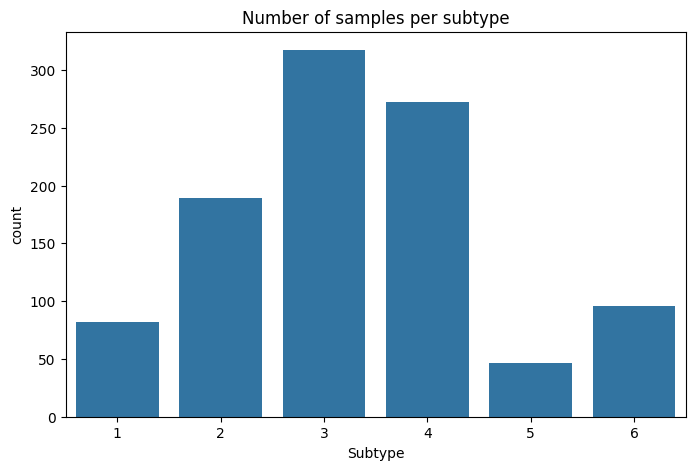

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Subtype', data=gene_df)
plt.title("Number of samples per subtype")
plt.show()

In [11]:
# Count number of samples in each subtype
class_counts = gene_df['Subtype'].value_counts()
print("Number of samples per subtype:")
print(class_counts)

Number of samples per subtype:
Subtype
4    776
3    630
1    266
2    251
6    144
5     66
Name: count, dtype: int64


In [12]:
gene_stats = gene_df.drop(columns='Subtype').describe().T
print(gene_stats.head())  # mean, std, min, max for first few genes


    count      mean       std       min       25%       50%       75%  max
0  2133.0  0.614005  0.311630  0.000000  0.339460  0.679522  0.910286  1.0
1  2133.0  0.470317  0.308354  0.022711  0.189185  0.395468  0.750537  1.0
2  2133.0  0.425992  0.298759  0.000000  0.145726  0.373967  0.679212  1.0
3  2133.0  0.589873  0.298137  0.015603  0.337417  0.638789  0.855400  1.0
4  2133.0  0.431111  0.278175  0.020986  0.160396  0.425025  0.659510  1.0


In [13]:
missing = gene_df.isnull().sum().sum()
print("Total missing values in dataset:", missing)


Total missing values in dataset: 0


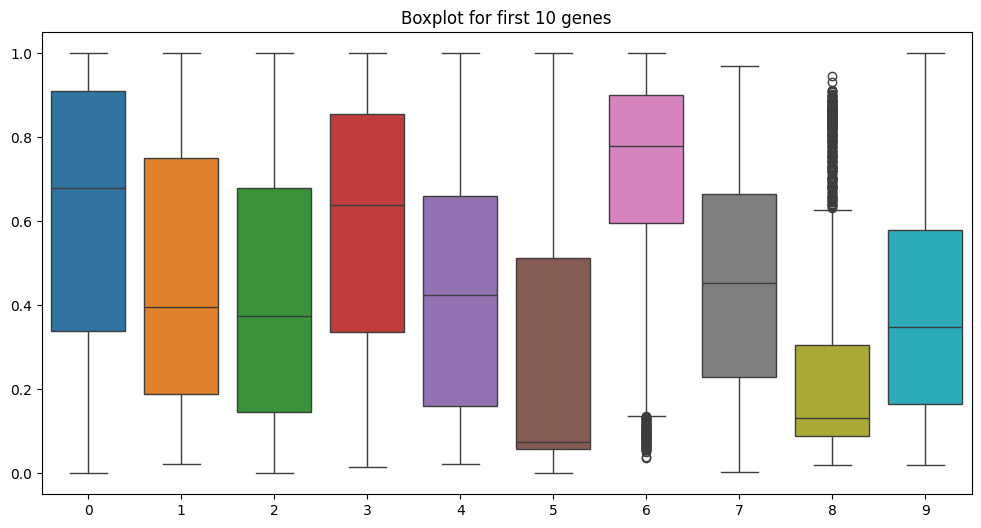

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data=gene_df.iloc[:, :10])  # first 10 genes
plt.title("Boxplot for first 10 genes")
plt.show()


In [15]:
# Separate features and target
X = gene_df.drop('Subtype', axis=1)
y = gene_df['Subtype']

# Apply Z-score standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with standardized data
gene_df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
gene_df_scaled['Subtype'] = y


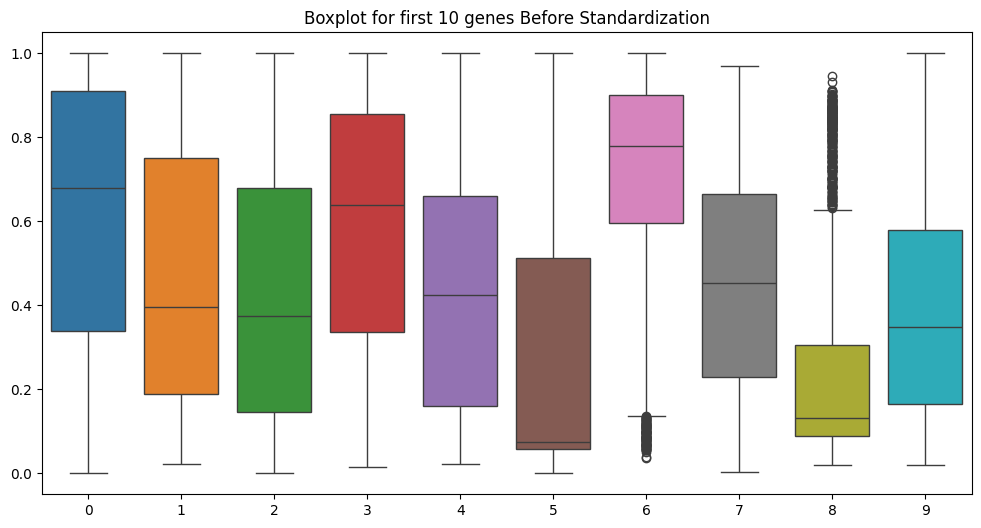

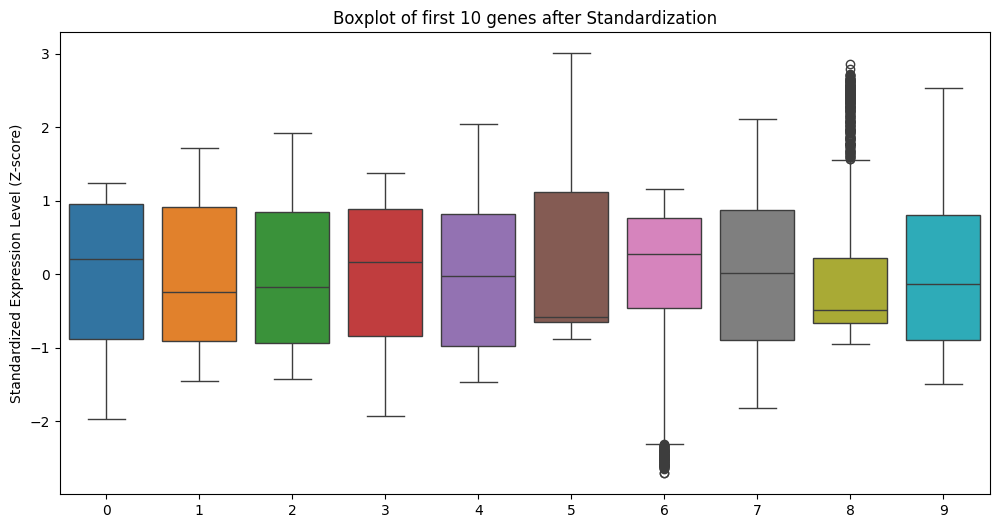

In [16]:
# Plot boxplot for the first 10 genes (for visualization)

plt.figure(figsize=(12,6))
sns.boxplot(data=gene_df.iloc[:, :10])  # first 10 genes
plt.title("Boxplot for first 10 genes Before Standardization")
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(data=gene_df_scaled.iloc[:, :10]) 
plt.title('Boxplot of first 10 genes after Standardization')
plt.ylabel('Standardized Expression Level (Z-score)')
plt.show()


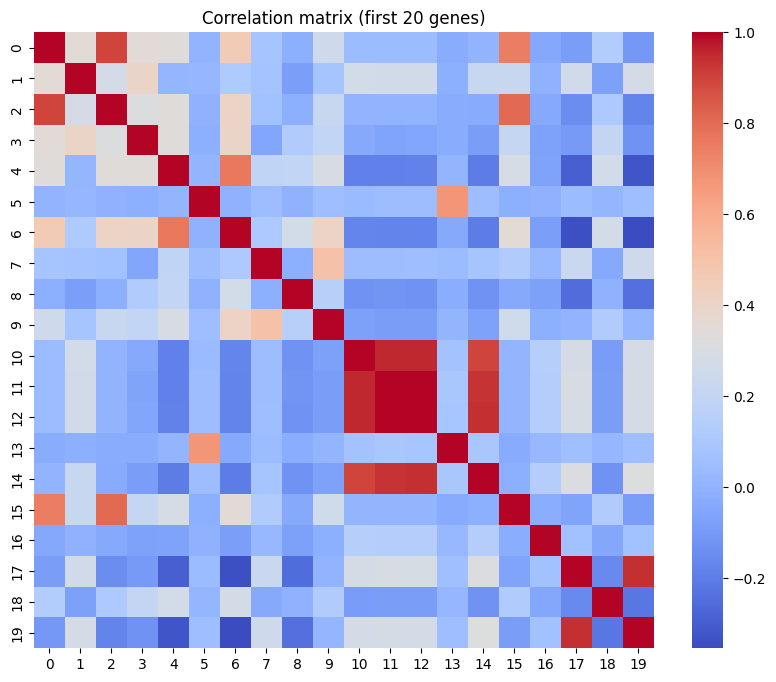

In [17]:
# Compute correlation for first 20 genes to keep it readable
corr_matrix = gene_df_scaled.iloc[:, :20].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation matrix (first 20 genes)")
plt.show()


In [18]:
# Check for missing values
print("Missing values per column:")
print(gene_df_scaled.isna().sum().head())

print("\nTotal missing values:", gene_df_scaled.isna().sum().sum())

Missing values per column:
0    0
1    0
2    0
3    0
4    0
dtype: int64

Total missing values: 0


In [19]:
# compute variance on original data before scaling
gene_variances_raw = gene_df.drop(columns=['Subtype']).var()

# sort by variance (descending)
top_genes_raw = gene_variances_raw.sort_values(ascending=False)

print(top_genes_raw.head(20))


0     0.097113
1     0.095082
2     0.089257
3     0.088886
4     0.077382
5     0.066203
6     0.061812
7     0.060541
8     0.059156
9     0.059109
10    0.058767
11    0.058735
12    0.056718
13    0.055271
14    0.052744
15    0.051607
16    0.051518
17    0.051358
18    0.049381
19    0.047981
dtype: float64


In [20]:
# compute variance on original data before scaling
gene_variances_raw = gene_df_scaled.drop(columns=['Subtype']).var()

# sort by variance (descending)
top_genes_raw = gene_variances_raw.sort_values(ascending=False)

print(top_genes_raw.head(20))


236    1.000469
159    1.000469
50     1.000469
486    1.000469
710    1.000469
15     1.000469
396    1.000469
805    1.000469
315    1.000469
6      1.000469
440    1.000469
574    1.000469
164    1.000469
176    1.000469
813    1.000469
849    1.000469
42     1.000469
939    1.000469
733    1.000469
33     1.000469
dtype: float64


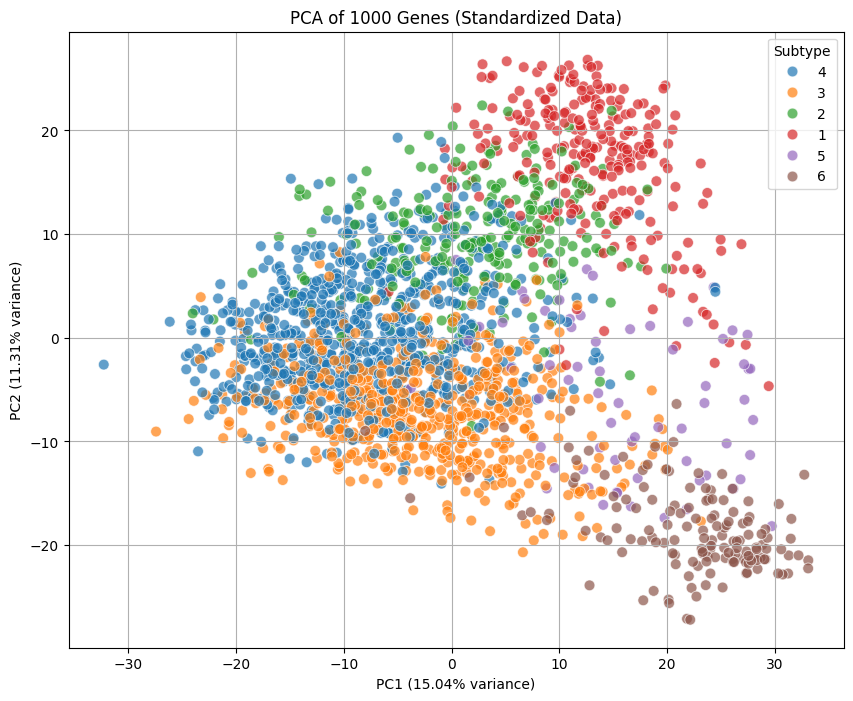

In [21]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(gene_df_scaled.drop(columns=['Subtype']))

# Формируем DataFrame для визуализации
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Subtype'] = gene_df_scaled['Subtype'].values.astype(str)  # для цвета лучше строка

# Визуализация
plt.figure(figsize=(10,8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Subtype',
    palette='tab10',
    data=pca_df,
    alpha=0.7,
    s=60
)
plt.title('PCA of 1000 Genes (Standardized Data)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.legend(title='Subtype')
plt.grid(True)
plt.show()

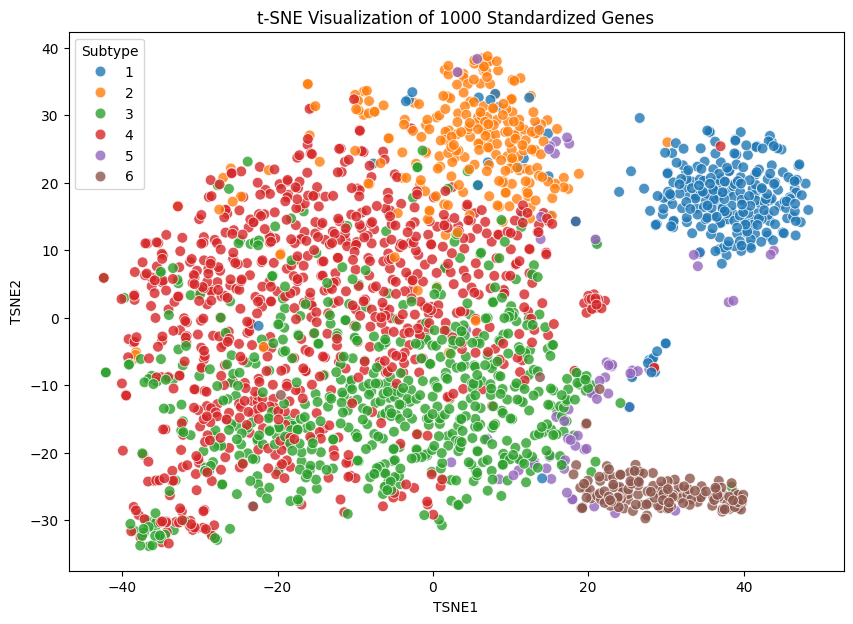

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Only genes (not subtype)
X = gene_df_scaled.drop(columns=['Subtype'])

# Labels
y = gene_df_scaled['Subtype']

# Run t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='pca',
    random_state=42
)

X_tsne = tsne.fit_transform(X)

# Prepare DataFrame for plotting
tsne_df = pd.DataFrame({
    "TSNE1": X_tsne[:, 0],
    "TSNE2": X_tsne[:, 1],
    "Subtype": y
})

# Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=tsne_df,
    x="TSNE1",
    y="TSNE2",
    hue="Subtype",
    palette="tab10",
    alpha=0.8,
    s=60
)
plt.title("t-SNE Visualization of 1000 Standardized Genes")
plt.show()
